## Assignment 2: Introduction to Data Science and AI

###  Module 2 Group 72 :Seyedehnaghmeh Mosaddeghi(10 h)- Aghigh Merikhi(10 h)

### 1- Introduction

We examine two separate datasets in this assignment, one from Hemnet and another from Scikit-learn. The main goal is to evaluate and gain valuable insights from these datasets using regression and classification algorithms.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 2. Hemnet Dataset

The first section is about analysis of the Hemnet dataset, we built a linear regression model to understand the relationship between the living area and the selling price of villas in Landvetter. The analysis involves data cleaning, model building, and evaluation.

2.1 Reading the Dataset: The Hemnet dataset contains information about villas' selling prices, including features like living area, rooms, land size, biarea, age, and selling price. Initially, the dataset comprises 56 rows and 7 columns.

In [2]:
# Reading the dataset
df_hemnet = pd.read_csv("hemnet.csv")

# Print the shape of the dataset
print(df_hemnet.shape)

df_hemnet.head(10)

(56, 7)


,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


2.2 Cleaning the Data: To prepare the data for analysis, the following steps were taken:

1- Rows with missing values in the "Living_area" and "Selling_price" columns were removed.
2- As we expected all values to be positive, rows containing negative values in specific columns ("Living_area," "Rooms," "Land_size," "Age," and "Selling_price") were also removed.

In [3]:
# Cleaning missing values
df_hemnet.dropna(subset=["Living_area", "Selling_price"], inplace=True)

# Remove rows with negative values in specific columns
cols_check_negative = ['Living_area', 'Rooms', 'Land_size', 'Age', 'Selling_price']
df_hemnet = df_hemnet[(df_hemnet[cols_check_negative] >= 0).all(axis=1)]


# Print the new shape of the dataset
print(df_hemnet.shape)

df_hemnet.head(10)

(53, 7)


,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


### 2.3.3. Questions

1. Find a linear regression model that relates the living area to the selling price. If in doing so, you
 performed any data cleaning step(s), describe what you did and explain why.


Linear Regression Model Creation:  To understand the relationship between the living area and the selling price, a linear regression model was created. The "Selling_price" was chosen as the dependent variable y, with the "Living_area" as the independent variable X.  A linear regression model was subsequently fitted to this data.

Model Evaluation: Metrics like Mean Squared Error (MSE) and R-squared (R2) were used to assess the performance of the model. The analysis showed that the model could account for 37.55% of the variation in selling prices depending on living area, with an MSE of around 793,814,470,623.05 and an R2 value of about 0.375. Since the R2 value is low, we expect to improve this model at the last part of this assignment.

Mean Squared Error: 793814470623.0554
R-squared: 0.3754691077211182


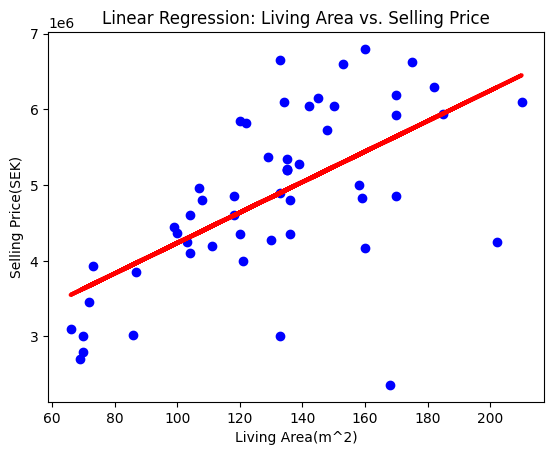

In [4]:
X = df_hemnet["Living_area"].values.reshape(-1, 1)
y = df_hemnet["Selling_price"]

# creating a linear regression model
Regmodel = LinearRegression().fit(X, y)

# Making predictions on the same dataset
y_pred = Regmodel.predict(X)

# Evaluating the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualizing the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel("Living Area(m^2)")
plt.ylabel("Selling Price(SEK)")
plt.title("Linear Regression: Living Area vs. Selling Price")
plt.show()

2. What are the values of the slope and intercept of the regression line?

Regression Line: The regression line equation was determined, with a slope of 20,151.28 and an intercept of 2,219,933.47. 

In [5]:
# Getting the slope and intercept
slope = Regmodel.coef_[0]
intercept = Regmodel.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")

# Displaying the regression equation
print(f"Regression Equation: Y = {slope} * X + {intercept}")

Slope (Coefficient): 20151.27952392175
Intercept: 2219933.4687544866
Regression Equation: Y = 20151.27952392175 * X + 2219933.4687544866


3. Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2, and
 200 m2.

The selling prices of the three living areas of 100 m2, 150 m2, and
 200 m2 are calculated as 4,235,061.42 SEK, 5,242,625.40 SEK and 6,250,189.37 SEK respectively using the regression model.

In [6]:
# Predicting selling prices for houses with living areas of 100 m², 150 m², and 200 m²
living_areas_to_predict = [[100], [150], [200]]
predicted_prices = Regmodel.predict(living_areas_to_predict)

# Printing the predicted prices
for i, living_area in enumerate([100, 150, 200]):
    print(f"Predicted price for a {living_area} m^2 house: {predicted_prices[i]:,.2f} SEK")



Predicted price for a 100 m^2 house: 4,235,061.42 SEK
Predicted price for a 150 m^2 house: 5,242,625.40 SEK
Predicted price for a 200 m^2 house: 6,250,189.37 SEK


4. Draw a residual plot. Discuss some potential strategies for improving the model.

To assess the model's performance and identify areas for potential improvement, we drew a residual plot. This plot shows the differences between the real selling prices and the prices predicted by our model. 

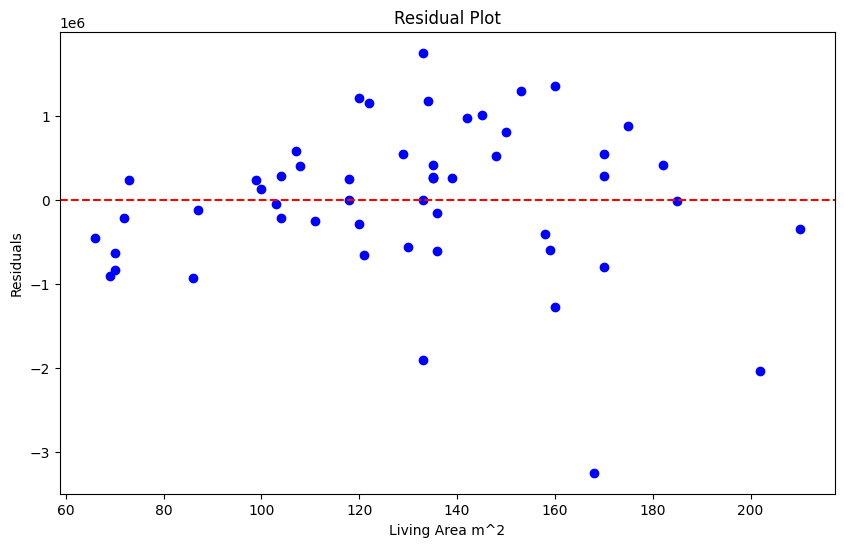

In [7]:
# Calculating residuals
residuals = y - y_pred

# Plotting a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Living Area m^2")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Strategies for Model Improvement

One of the strategies to improve our model is to remove the outliers. By investigating our data especially residual plot, we understood that outlier removing can be a useful method. In this case we choose Z-score as an index for removing outliers. Z-scores are computed for both the "Living_area" and "Selling_price" columns. A threshold value, defined as z_score_threshold, is set to 2, meaning any data points with Z-scores greater than 2 (positive or negative) in either the "Living_area" or "Selling_price" column are considered outliers. Rows in the dataset where the absolute Z-scores for "Living_area" or "Selling_price" exceed the defined threshold are removed. 

Mean Squared Error on Cleaned Data: 490488888497.66425
R-squared on Cleaned Data: 0.5857654741866807
Shape of data before outlier removal: (53, 7)
Shape of data after outlier removal: (50, 7)


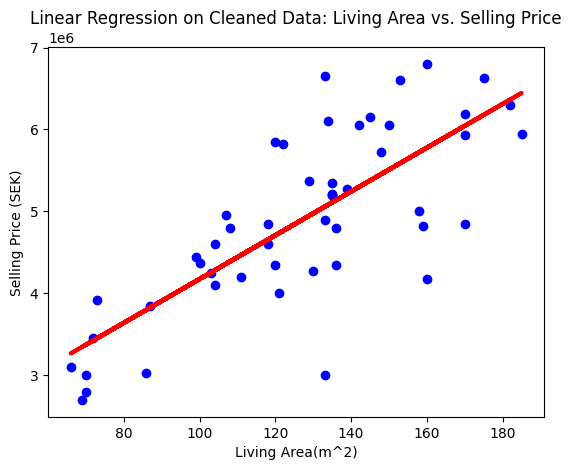

In [8]:
# Calculating z-scores for the "living_area" and "selling_price" columns
z_scores = (df_hemnet[["Living_area", "Selling_price"]] - df_hemnet[["Living_area", "Selling_price"]].mean()) / df_hemnet[["Living_area", "Selling_price"]].std()

# Defining a z-score threshold
z_score_threshold = 2

# Removing rows with outliers based on the z-scores
df_hemnet_no_outliers = df_hemnet[(z_scores["Living_area"].abs() <= z_score_threshold) & (z_scores["Selling_price"].abs() <= z_score_threshold)]

# Creating features (X) and target (y)
X_no_outlier = df_hemnet_no_outliers[["Living_area"]]
y_no_outlier = df_hemnet_no_outliers["Selling_price"]

# Creating a new linear regression model on the cleaned data
new_model = LinearRegression()

# Fiting the model to the cleaned data
new_model.fit(X_no_outlier, y_no_outlier)

# Making predictions on the cleaned data
y_pred_no_outlier = new_model.predict(X_no_outlier)

# Evaluating the model on the cleaned data
mse_no_outlier = mean_squared_error(y_no_outlier, y_pred_no_outlier)
r2_no_outlier = r2_score(y_no_outlier, y_pred_no_outlier)

print("Mean Squared Error on Cleaned Data:", mse_no_outlier)
print("R-squared on Cleaned Data:", r2_no_outlier)
print("Shape of data before outlier removal:", df_hemnet.shape)
print("Shape of data after outlier removal:", df_hemnet_no_outliers.shape)

# Visualizing the regression line on the cleaned data
plt.scatter(X_no_outlier, y_no_outlier, color='blue')
plt.plot(X_no_outlier, y_pred_no_outlier, color='red', linewidth=3)
plt.xlabel("Living Area(m^2)")
plt.ylabel("Selling Price (SEK)")
plt.title("Linear Regression on Cleaned Data: Living Area vs. Selling Price")
plt.show()


As can be seen in the results, by removing 3 datapoints we improve our model by enhancing R2 to approximately 0.58. 

### 3. Iris Dataset

### 3.1. Introduction

The main aim of the this task is to explore, analyze, and classify iris flowers based on their features.

### 3.2 Questions

3.2.1. Use a confusion matrix to evaluate the use of logistic regression to classify the Iris data set.

1. The Iris Dataset is imported.

2. A plot is drawn which shows the data in each class by different colors.

3. The data is splitted into test and train data and trained our logistic regression classifier model with train data.

4. We used the trained classifier to make predictions on test data.

5. The confusion matrix is calculated based on the predicted labels and real labels on test data.

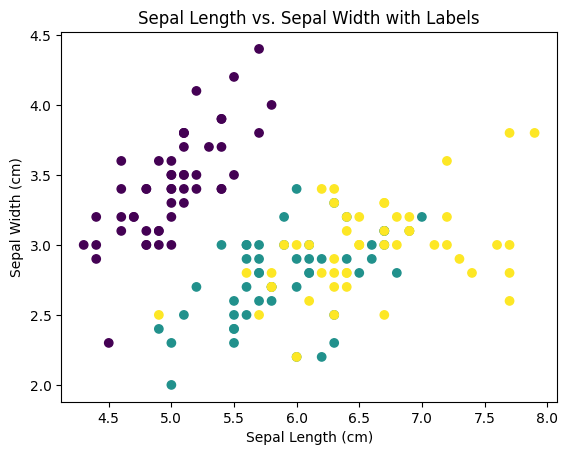

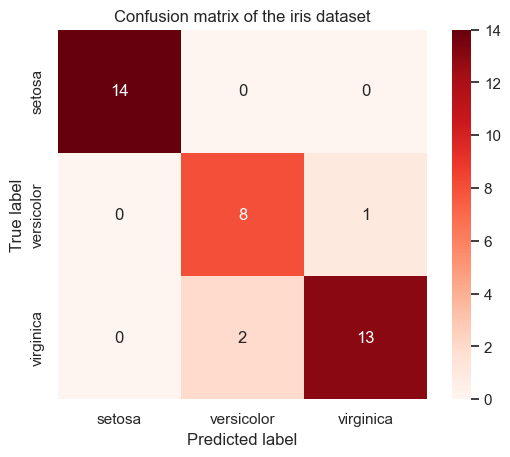

In [9]:
# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Plot the data
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width with Labels')
plt.show()

# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)

# Train a logistic regression classifier
logistic_classifier = LogisticRegression(random_state=0, max_iter=1000)
logistic_classifier.fit(X_train_iris, y_train_iris)

# Make predictions on the test data
y_pred_iris = logistic_classifier.predict(X_test_iris)


# Create the confusion matrix
conf_matr_LR = confusion_matrix(y_test_iris, y_pred_iris)
labels = iris.target_names
sns.set()
fig, ax = plt.subplots()
sns.heatmap(conf_matr_LR, square=True, annot=True, cmap="Reds",xticklabels=labels, yticklabels=labels, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix of the iris dataset')
plt.show()


As can be seen in the scatter plot, one of the classes(purple) is distinguished from the other two classes (green and yellow) in the scatter plot, whereas the yellow and green are more tightly packed. Additionally, we can see that there is significant overlap between green and yellow classes in terms of sepal length and width, which may help to explain why the logistic regression model may have trouble accurately classifying those samples. As we can see on the confusion matrix, There are errors in prediction the labels. The model can be improved by using k-nearest neighbors method for classification.

3.2.2. Use k-nearest neighbors to classify the Iris data set with some different values for k, and with
 uniform and distance-based weights. What will happen when k grows larger for the different
 cases? Why?

k in K-nearest neighbors represents the number of nearest neighbors to consider in making predictions. We can also choose between uniform and distance-based weights for neighbors. Small k makes the model sensitive to noise and larger k makes the model more robust but may suffer from underfitting. Distance-based weights assign higher influence to closer neighbors. Here we investigate the effect of different values of K in both uniform and distance-based weighting.

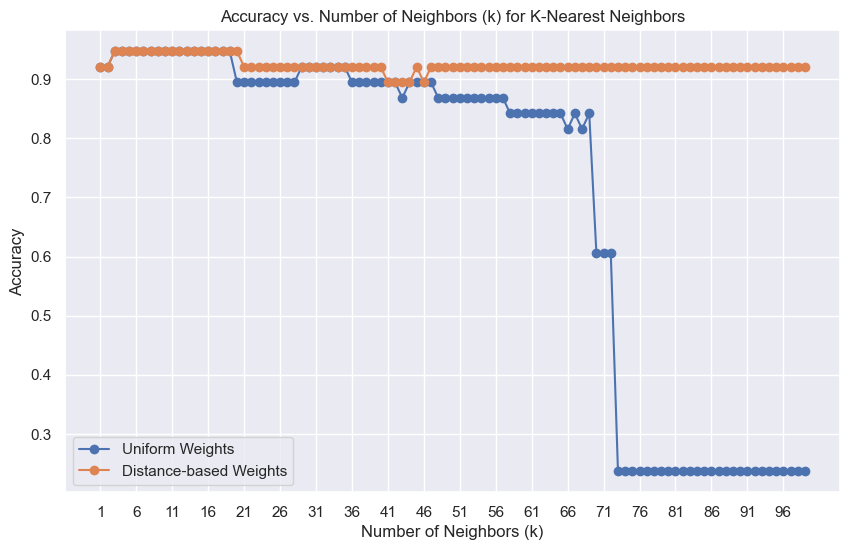

In [10]:

# Define a range of k values from 1 to 100
k_values = list(range(1, 100))

# Create lists to store accuracy scores for uniform and distance-based weights
accuracy_uniform = []
accuracy_distance = []

for k in k_values:
    # K-nearest neighbors model with uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train_iris, y_train_iris)
    y_pred_uniform = knn_uniform.predict(X_test_iris)
    accuracy_uniform.append(accuracy_score(y_test_iris, y_pred_uniform))

    # K-nearest neighbors model with distance-based weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train_iris, y_train_iris)
    y_pred_distance = knn_distance.predict(X_test_iris)
    accuracy_distance.append(accuracy_score(y_test_iris, y_pred_distance))

# Plot the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_uniform, marker='o', label='Uniform Weights', linestyle='-')
plt.plot(k_values, accuracy_distance, marker='o', label='Distance-based Weights', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k) for K-Nearest Neighbors')
plt.xticks(k_values[::5])  
plt.legend()
plt.grid(True)
plt.show()

The classification becomes less dependent on noise in the data as the value of k increases for the various situations. This is due to the prediction for a new data point depending on a larger amount of nearby points, which smooths out the decision boundary and reduces the influence of individual data points on the classification. However, as k increases, the algorithm's decision-making process to decide what class to assign to a new data point becomes less dependent on the characteristics of that point and more dependent on the majority class of its k closest neighbors. Due to this, the training and testing data may no longer be as accurate. This is exactly what happens in the uniform weighting.

On the other hand in distance-based weighting, the accuracy of the model approximately maintains the same since in this approach, the more weight is given to the closer neighbors. In larger number of k, distance also plays an important role in addition to the number of neighbors and farther neighbors have less weights.

3.3.3. Compare the classification models for the Iris data set that are generated by k-nearest neighbors
 (for the different settings from question 2) and by logistic regression. Calculate confusion matrices
 for these models and discuss the performance of the various models.

The best k for uniform weights is: 6
The best k for distance-based weights is: 10


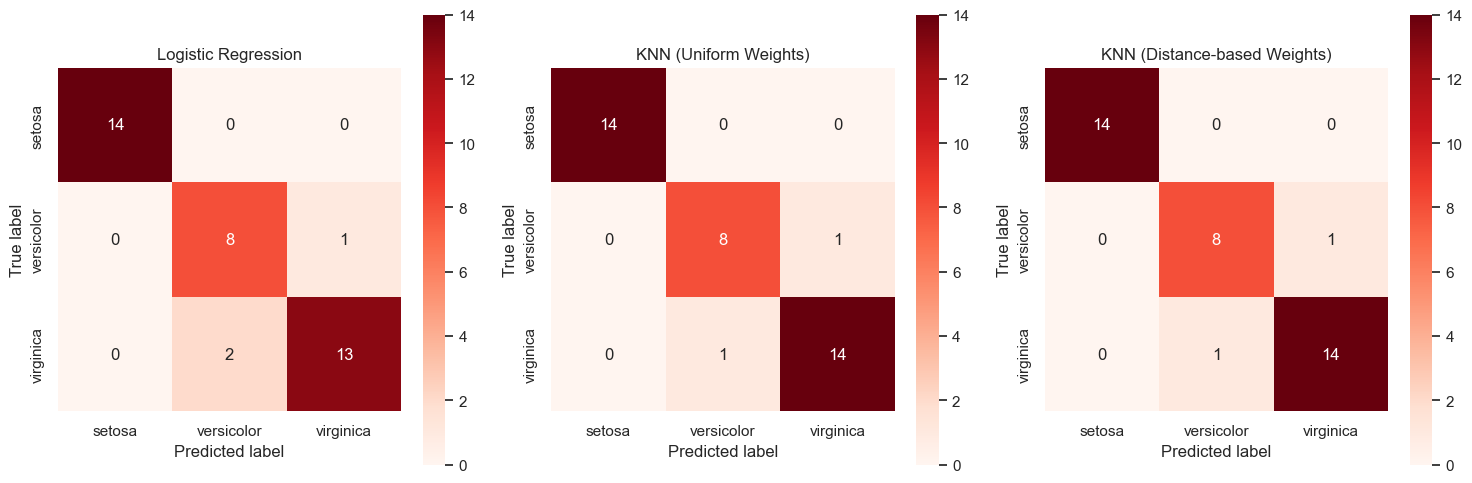

In [12]:

# Initialize lists to store cross-validation scores for uniform and distance-based models
cross_val_scores_uniform = []
cross_val_scores_distance = []

# Perform cross-validation for each k for uniform and distance-based models
for k in k_values:
    # Uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores_uniform = cross_val_score(knn_uniform, X_iris, y_iris, cv=5, scoring='accuracy')
    cross_val_scores_uniform.append(scores_uniform.mean())

    # Distance-based weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores_distance = cross_val_score(knn_distance, X_iris, y_iris, cv=5, scoring='accuracy')
    cross_val_scores_distance.append(scores_distance.mean())

# Find the best k for uniform and distance-based models
best_k_uniform = k_values[cross_val_scores_uniform.index(max(cross_val_scores_uniform))]
best_k_distance = k_values[cross_val_scores_distance.index(max(cross_val_scores_distance))]

print(f"The best k for uniform weights is: {best_k_uniform}")
print(f"The best k for distance-based weights is: {best_k_distance}")


# Create and fit a K-nearest neighbors model with distance-based weights
knn_uniform_best = KNeighborsClassifier(n_neighbors=best_k_uniform, weights='uniform')
knn_uniform_best.fit(X_train_iris, y_train_iris)
y_pred_uniform_best = knn_uniform_best.predict(X_test_iris)

# Create and fit a K-nearest neighbors model with distance-based weights
knn_distance_best = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn_distance_best.fit(X_train_iris, y_train_iris)
y_pred_distance_best = knn_distance_best.predict(X_test_iris)


# Create confusion matrix for K-nearest neighbors with uniform weights
conf_matr_uni = confusion_matrix(y_test_iris, y_pred_uniform_best)

# Create confusion matrix for K-nearest neighbors with distance-based weights
conf_matr_dis = confusion_matrix(y_test_iris, y_pred_distance_best)

# Set the labels
labels = iris.target_names


fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
# Plot for logistic regression
sns.heatmap(conf_matr_LR, square=True, annot=True, cmap="Reds", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')
axes[0].set_title('Logistic Regression')

# Plot for K-nearest neighbors with uniform weights
sns.heatmap(conf_matr_uni, square=True, annot=True, cmap="Reds", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')
axes[1].set_title('KNN (Uniform Weights)')

# Plot for K-nearest neighbors with distance-based weights
sns.heatmap(conf_matr_dis, square=True, annot=True, cmap="Reds", xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_xlabel('Predicted label')
axes[2].set_ylabel('True label')
axes[2].set_title('KNN (Distance-based Weights)')

plt.tight_layout()
plt.show()


We used logistic regression to categorize the iris dataset in the second part of our assignment, and we assessed its effectiveness using a confusion matrix. In the third section, we used k-nearest neighbors to classify the iris dataset using a range of "k" values and both uniform and distance-based weights. By looking at their confusion matrices, we evaluated how well these classifiers performed.

we determined that the optimal choice for "k" using the cross-validation method, in the uniform weight classifier is 6, while for the distance-based weight classifier, it is 10. For these k values, the confusion matrixes are visualized in addition to the logistic regression classifier. According to the matrixes, there are more wrong predictions in logistic regression in comparison with KNN (Uniform weights) and KNN (Distance-based weights). Hence we can conclude that KNN, both Uniform and Distance-based weights, perform a better classification model.

### References:


[1] Hemnet Dataset. Retrieved October 18, 2020, from https://www.hemnet.se/
[2] Iris Dataset. Retrieved September 03, 2023, from https://scikit-learn.org/stable/modules/
generated/sklearn.datasets.load_iris.html



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05d86ed7-77dc-4d57-baa3-23063c711d41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>